In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df=pd.read_csv('/content/me_cfs_vs_depression_dataset.csv')
df.head()

,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,Male,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0,Working,Low,Daily,Yes,Depression
1,69,Male,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1,Working,Low,Often,Yes,Both
2,46,Female,4.0,5.4,4.8,NaN,24.0,1.6,13.0,6.9,0,Partially working,NaN,Rarely,Yes,Depression
3,32,Female,9.4,2.1,2.9,3.8,10.0,6.8,11.0,7.5,0,Not working,High,Never,Yes,Depression
4,60,Female,7.6,7.5,6.4,8.5,17.0,7.0,46.0,3.1,1,Not working,Low,Rarely,No,Both


In [ ]:
df.isna().sum()

,0
age,0
gender,0
sleep_quality_index,47
brain_fog_level,48
physical_pain_score,34
stress_level,48
depression_phq9_score,22
fatigue_severity_scale_score,21
pem_duration_hours,24
hours_of_sleep_per_night,21


In [ ]:
class_counts = df['diagnosis'].value_counts().sort_index()

/tmp/ipython-input-7-3978418489.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')


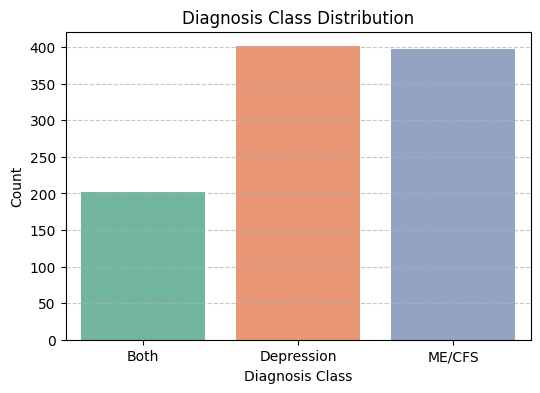

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')

plt.title('Diagnosis Class Distribution')
plt.xlabel('Diagnosis Class')
plt.ylabel('Count')
plt.xticks(ticks=range(len(class_counts)), labels=class_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(670, 16)

In [ ]:
df

,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,Male,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0,Working,Low,Daily,Yes,Depression
1,69,Male,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1,Working,Low,Often,Yes,Both
3,32,Female,9.4,2.1,2.9,3.8,10.0,6.8,11.0,7.5,0,Not working,High,Never,Yes,Depression
4,60,Female,7.6,7.5,6.4,8.5,17.0,7.0,46.0,3.1,1,Not working,Low,Rarely,No,Both
5,25,Female,3.5,3.9,6.4,6.5,9.0,7.5,41.0,4.1,1,Partially working,Medium,Never,No,ME/CFS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,65,Male,1.3,7.3,4.3,5.6,9.0,7.0,19.0,5.3,1,Partially working,Very high,Sometimes,Yes,ME/CFS
993,53,Male,8.4,8.4,2.1,8.6,23.0,8.6,44.0,4.1,1,Not working,Medium,Daily,Yes,Both
997,52,Male,8.7,4.2,8.7,3.4,7.0,7.0,40.0,9.2,1,Working,Very high,Daily,Yes,ME/CFS
998,69,Male,2.1,1.1,9.9,2.5,15.0,3.5,37.0,3.3,0,Partially working,Low,Never,No,Depression


In [ ]:
df = df.copy()

In [ ]:
df.describe()

,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present
count,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000
mean,44.102985,5.478209,5.674478,5.532985,5.467313,12.365672,6.414478,23.134328,6.567164,0.597015
std,15.284345,2.612887,2.646077,2.558903,2.554592,6.381425,2.201633,13.900883,2.048828,0.490864
min,18.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.100000,0.000000,3.000000,0.000000
25%,31.000000,3.100000,3.400000,3.425000,3.300000,9.000000,6.325000,11.000000,4.800000,0.000000
50%,45.000000,5.500000,5.800000,5.500000,5.450000,10.000000,7.000000,23.000000,6.600000,1.000000
75%,56.750000,7.800000,8.000000,7.800000,7.700000,16.000000,7.600000,35.000000,8.400000,1.000000
max,70.000000,10.000000,10.000000,10.000000,10.000000,27.000000,10.000000,47.000000,10.000000,1.000000


In [ ]:
df.columns

Index(['age', 'gender', 'sleep_quality_index', 'brain_fog_level',
       'physical_pain_score', 'stress_level', 'depression_phq9_score',
       'fatigue_severity_scale_score', 'pem_duration_hours',
       'hours_of_sleep_per_night', 'pem_present', 'work_status',
       'social_activity_level', 'exercise_frequency',
       'meditation_or_mindfulness', 'diagnosis'],
      dtype='object')

In [ ]:
df.dtypes

,0
age,int64
gender,object
sleep_quality_index,float64
brain_fog_level,float64
physical_pain_score,float64
stress_level,float64
depression_phq9_score,float64
fatigue_severity_scale_score,float64
pem_duration_hours,float64
hours_of_sleep_per_night,float64


In [ ]:
# Correctly encode the target variable first
target_encoder = LabelEncoder()
df['diagnosis'] = target_encoder.fit_transform(df['diagnosis'])


In [ ]:
# Now encode the feature columns
feature_encoder = LabelEncoder()
object_cols = ['gender','work_status', 'social_activity_level', 'exercise_frequency', 'meditation_or_mindfulness']

for col in object_cols:
    df[col] = feature_encoder.fit_transform(df[col])

In [ ]:
df.head()

,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,1,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0,2,1,0,1,1
1,69,1,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1,2,1,2,1,0
3,32,0,9.4,2.1,2.9,3.8,10.0,6.8,11.0,7.5,0,0,0,1,1,1
4,60,0,7.6,7.5,6.4,8.5,17.0,7.0,46.0,3.1,1,0,1,3,0,0
5,25,0,3.5,3.9,6.4,6.5,9.0,7.5,41.0,4.1,1,1,2,1,0,2


In [ ]:
df.dtypes

,0
age,int64
gender,int64
sleep_quality_index,float64
brain_fog_level,float64
physical_pain_score,float64
stress_level,float64
depression_phq9_score,float64
fatigue_severity_scale_score,float64
pem_duration_hours,float64
hours_of_sleep_per_night,float64


In [ ]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']
print(X.shape)
print(y.shape)

(670, 15)
(670,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [ ]:
# 1. Initialize the scaler
scaler = StandardScaler()
# 2. Fit on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
# 3. Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
print(f"Original X_train: {X_train_scaled.shape}")
print(f"Resampled X_train: {X_resampled.shape}")

Original X_train: (603, 15)
Resampled X_train: (741, 15)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()
model.fit(X_resampled, y_resampled)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
model_score=model.score(X_test_scaled,y_test)
print(model_score)

0.9850746268656716


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       1.00      1.00      1.00        23
           2       0.97      1.00      0.98        31

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



Confusion Matrix:


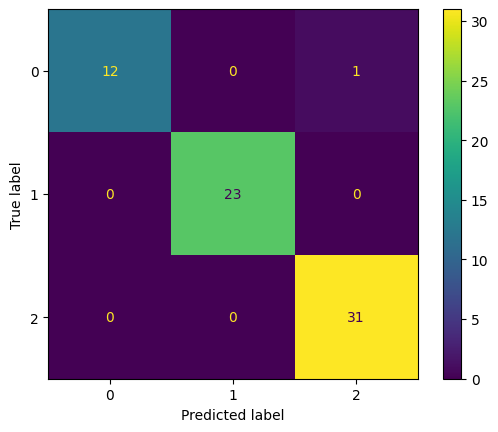

In [ ]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, model.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.9767827529021559
Test Accuracy: 0.9850746268656716


In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

 Accuracy: 0.9850746268656716
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       1.00      1.00      1.00        23
           2       0.97      1.00      0.98        31

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



Confusion Matrix:


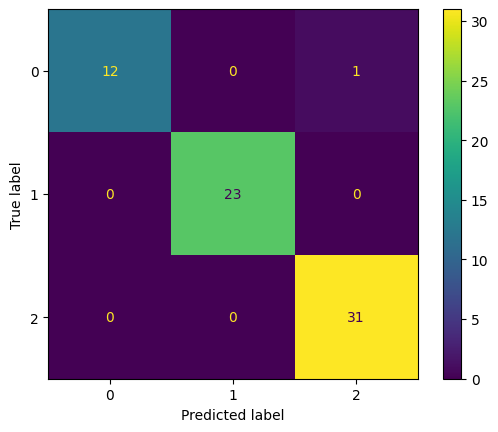

In [ ]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()